<a href="https://colab.research.google.com/github/Sanjay05-coder/Loan-Approval-Logistic-Regression-Project/blob/main/Logistic_Regression(Loan_Approval).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [85]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split# training
from sklearn.linear_model import LogisticRegression # logistic regression library
from sklearn.metrics import confusion_matrix # model eval
import matplotlib.pyplot as plt# visuals
from sklearn.metrics import accuracy_score # to evaluate how accurate model is
import seaborn as sns# visuals

//

# Import Dataset

In [ ]:
df=pd.read_csv('/content/bankloan.csv')
df

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [88]:
df.corr().round(2)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP.Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal.Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


<Axes: >

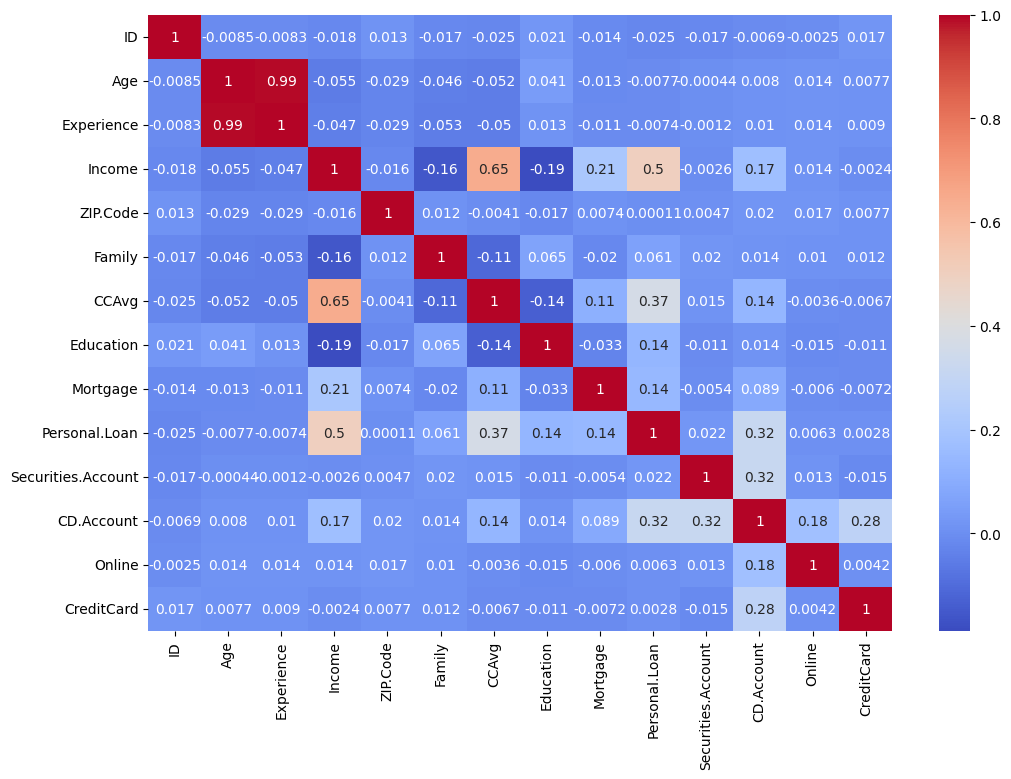

In [89]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [90]:
df.head(20)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [91]:
df['Personal.Loan'].value_counts()

,count
Personal.Loan,
0,4520
1,480


In [92]:
#(y) Personal.Loan'. 0 indicates loan not approved and 1 indicates loan approved



In [106]:
X=df[['Income']]
y=df[['Personal.Loan']]
# y must be binary like yes or no inthis case is 1 and 0 so we can use it as target

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
#logistic Regression Model

model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Predict the target variable

In [114]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)# saying to predcit y using features (x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


# predict probability of passing

In [118]:
x = int(input('How much is your income? '))

probabilities = model.predict_proba(np.array([x]).reshape(1, -1))[0][1]
print(f"Probability of your income: {probabilities:.2f}")



How much is your income? 90
Probability of your income: 0.06


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
# so here we r using 0.5 as our threshold so if the x probability is above the threshold it wills how laon approve else loan is approved
if probabilities > 0.5:  # defaults is 0.5
    print("loan approved")
else:
    print("loan not approved")
    # below shows n example of loan not approved

loan not approved


In [97]:
# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred) # actual , Predicted

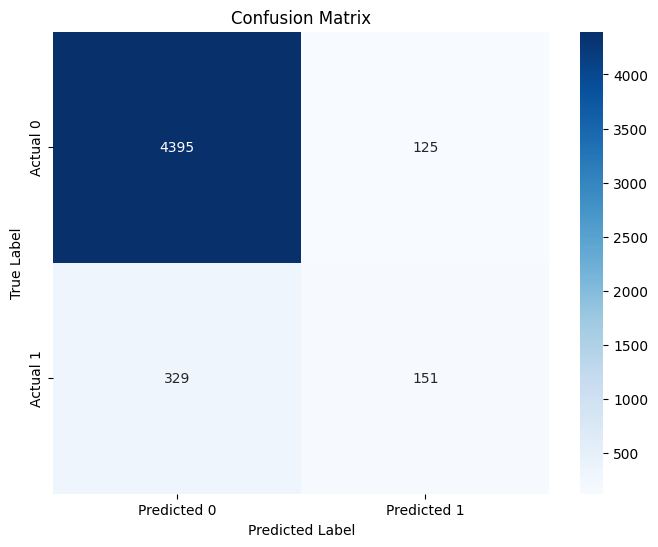

In [120]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

This